HW1
Xiyao Xu
05/22

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt

Calculate the mean function

In [57]:
def calc_mean(data):
    return sum(data) / len(data)

Calculate the standard deviation function

In [58]:
def calc_std(data):
    mean = calc_mean(data)
    return sqrt(sum((x - mean)**2 for x in data) / len(data))

Draw 1000 samples from the standard normal distribution

In [59]:
samples = norm.rvs(size=1000)

Calculate sample mean and standard deviation

In [60]:
print(f"Sample Mean (Custom Function): {calc_mean(samples):.2f}, Standard Deviation (Custom Function): {calc_std(samples):.2f}")
print(f"Sample Mean (Numpy): {np.mean(samples):.2f}, Standard Deviation (Numpy): {np.std(samples):.2f}")


Sample Mean (Custom Function): 0.02, Standard Deviation (Custom Function): 0.98
Sample Mean (Numpy): 0.02, Standard Deviation (Numpy): 0.98


Draw sample histogram

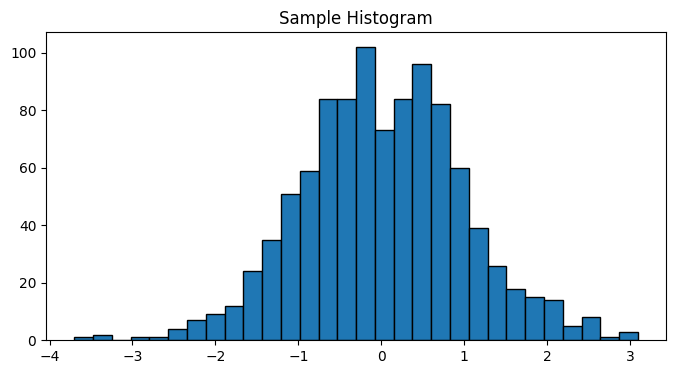

In [61]:
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=30, edgecolor='black')
plt.title("Sample Histogram")
plt.show()

Read CSV data

In [62]:
df = pd.read_csv('2021-PM2.5.csv')

Convert date column to datetime type

In [63]:
df['Date'] = pd.to_datetime(df['Date'])

Select data from 'BV-MC' monitoring station

In [64]:
station_data = df[['Date', 'BV-MC']]

Draw a graph of changes in PM2.5 levels throughout the year

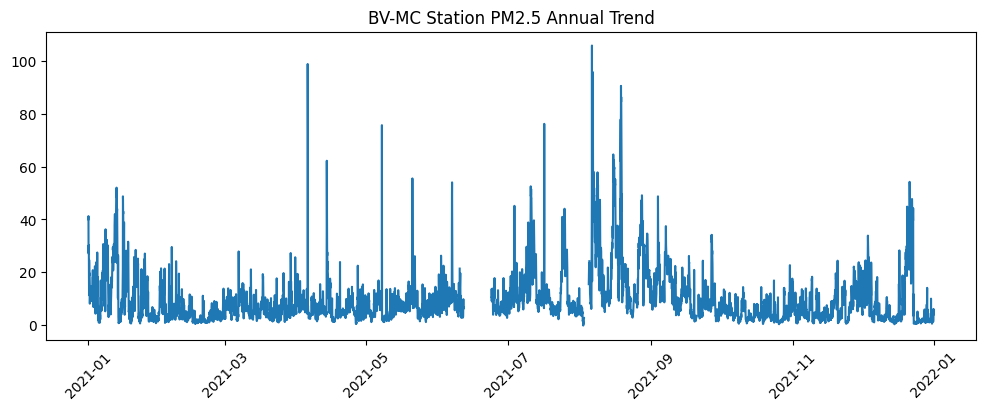

In [65]:
plt.figure(figsize=(12, 4))
plt.plot(station_data['Date'], station_data['BV-MC'])
plt.title(f"BV-MC Station PM2.5 Annual Trend")
plt.xticks(rotation=45)
plt.show()

In [66]:
monthly_avg = station_data.groupby(pd.Grouper(key='Date', freq='ME')).mean()

Draw monthly average histogram

<Figure size 1000x400 with 0 Axes>

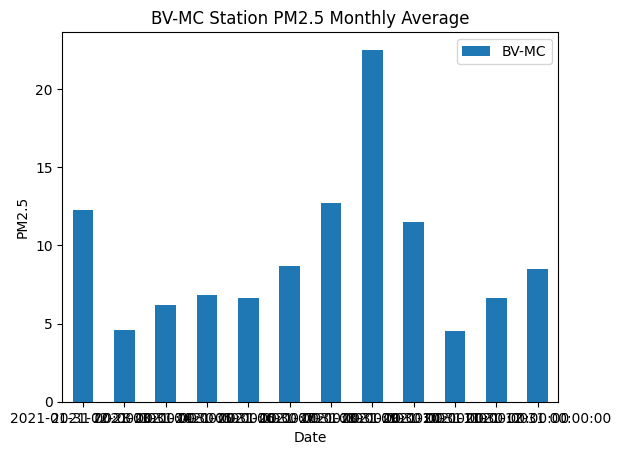

In [67]:
plt.figure(figsize=(10, 4))
monthly_avg.plot.bar(rot=0)
plt.title(f"BV-MC Station PM2.5 Monthly Average")
plt.ylabel("PM2.5")
plt.show()

In [68]:
station_data = station_data.copy()
station_data.loc[:, 'hour'] = station_data['Date'].dt.hour

In [69]:
hourly_avg = station_data.groupby('hour').mean()

Draw a histogram of hourly averages

<Figure size 1000x400 with 0 Axes>

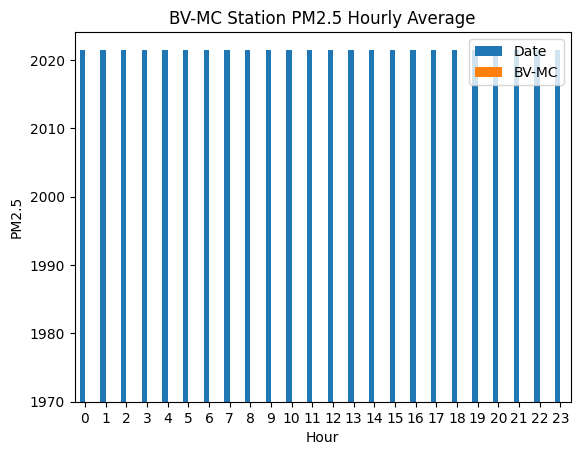

In [70]:
plt.figure(figsize=(10, 4))
hourly_avg.plot.bar(rot=0)
plt.title(f"BV-MC Station PM2.5 Hourly Average")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.show()

Draw a monthly boxplot

<Figure size 1000x400 with 0 Axes>

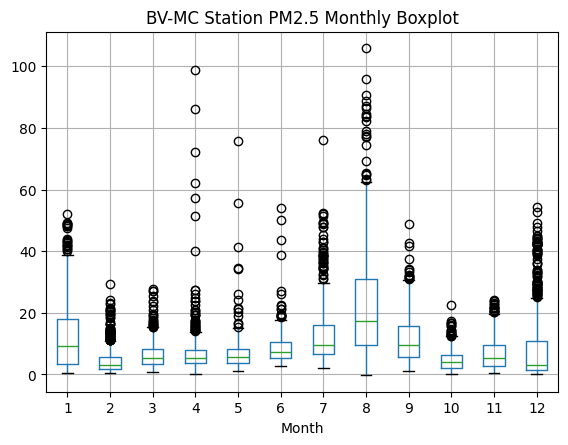

In [71]:
plt.figure(figsize=(10, 4))
station_data.boxplot(column=['BV-MC'], by=station_data['Date'].dt.month, xlabel='Month')
plt.title(f"BV-MC Station PM2.5 Monthly Boxplot")
plt.xlabel("Month")
plt.suptitle("")
plt.show()

Draw hourly box plot

<Figure size 1200x400 with 0 Axes>

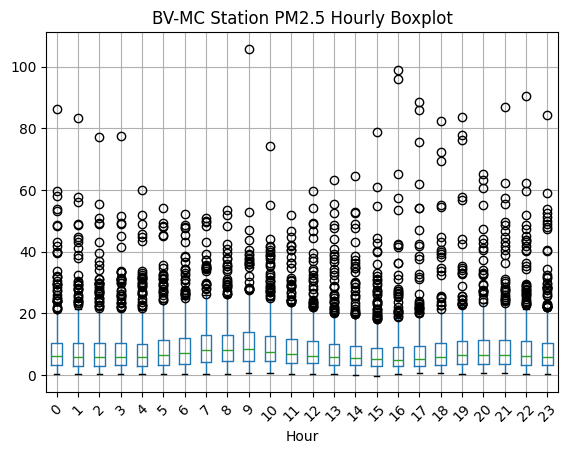

In [72]:
plt.figure(figsize=(12, 4))
station_data.boxplot(column=['BV-MC'], by='hour', xlabel='Hour')
plt.title(f"BV-MC Station PM2.5 Hourly Boxplot")
plt.xlabel("Hour")
plt.suptitle("")
plt.xticks(rotation=45)
plt.show()